In [5]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vishn\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    ca-certificates-2023.11.17 |       h56e8100_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-content-trust-0.2.0  |     pyhd8ed1ab_0          57 KB  conda-forge
    libxgboost-1.7.3           |       hd77b12b_0         1.5 MB
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    py-xgboost-1.7.3           |  py311haa95532_0         274 KB
    xgboost-1.7.3              |  py311haa95532_0          13 KB
    ------------------------------------------------------------
                                           Total:         7.7 MB

T

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GE

In [28]:
import xgboost as xgb
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Load your downloaded dataset
df = pd.read_csv("C:/Users/vishn/Downloads/output.csv")  # Replace with the actual path to your dataset
# Drop 'Date' column
df = df.drop(columns=['Date'])
df.head()

,Price,Likes,Dislikes,Followers
0,1006.39,9001,402,15002
1,1011.81,9003,403,15003
2,1017.26,9004,405,15004
3,1022.74,9006,407,15006
4,1028.25,9008,408,15008


In [41]:
# Examine data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2191.0,117997.803432,166245.774920,1006.39,7312.32,34942.15,162689.8,445911.69
Likes,2191.0,11127.217252,1267.897539,9001.00,10001.00,11202.00,12199.5,13396.00
Dislikes,2191.0,2064.840712,959.902626,402.00,1234.50,2071.00,2893.0,3714.00
Followers,2191.0,17125.631219,1261.799955,15002.00,16011.00,17199.00,18199.0,19377.00
day_of_year,2191.0,183.083524,105.438536,1.00,92.00,183.00,274.0,366.00


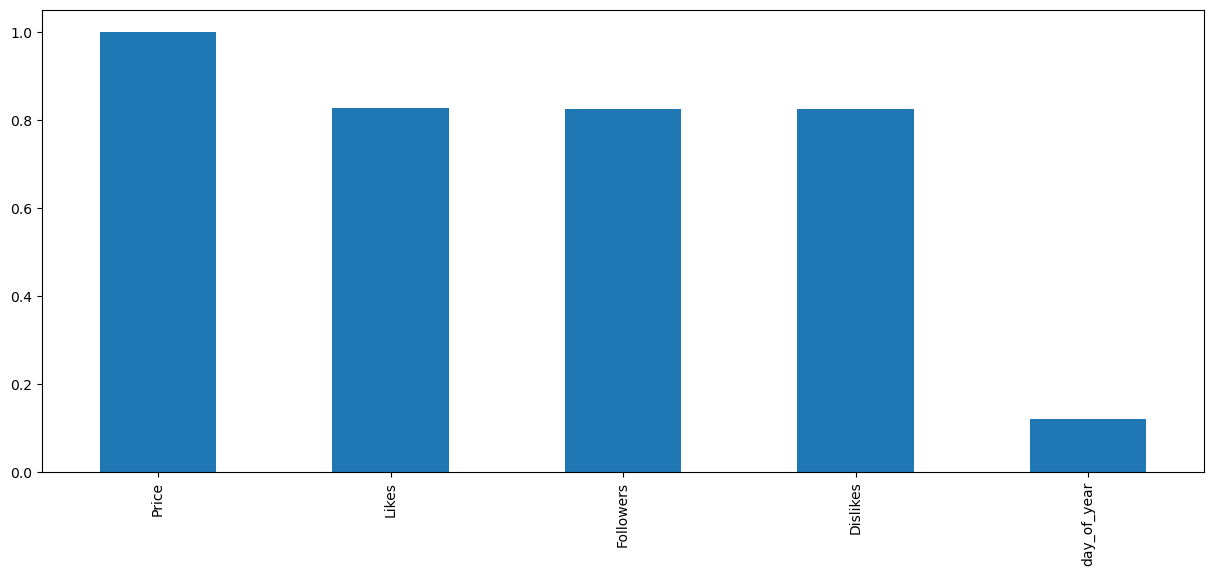

In [42]:
# Plot data 
plt.figure(figsize=(15, 6))
bars = df.corr()['Price'].sort_values(ascending=False).plot(kind='bar')

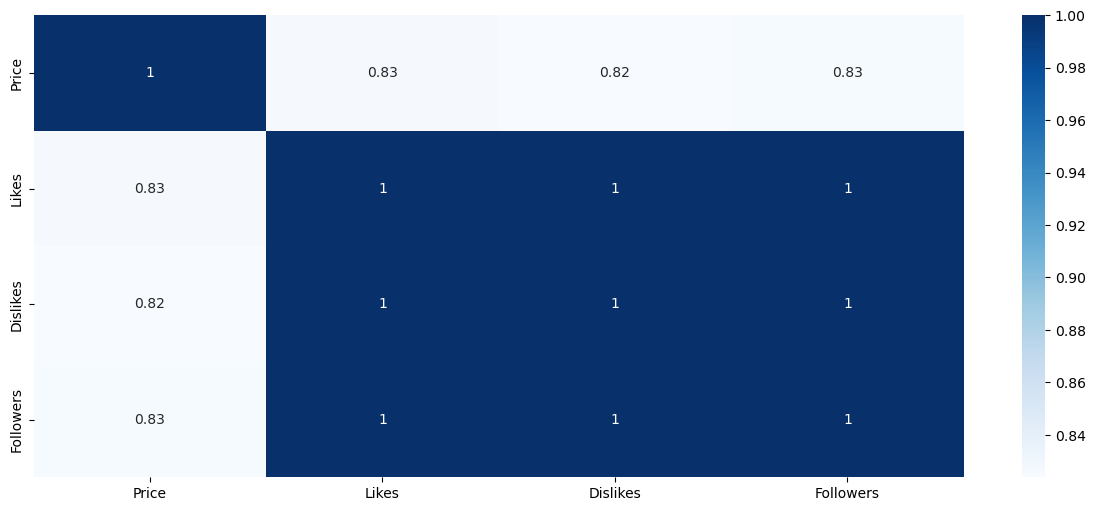

In [69]:
# Create a heatmap
 
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

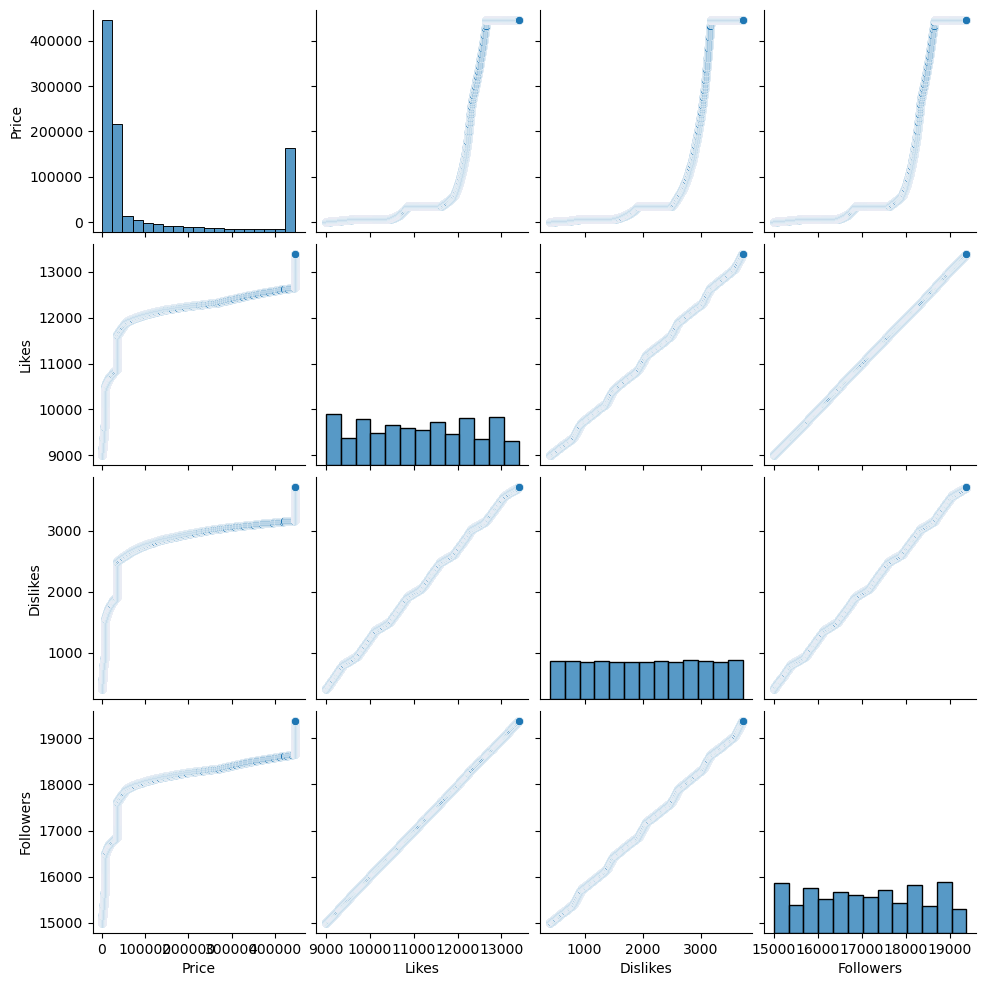

In [70]:
sns.pairplot(df)

In [71]:
# Create training and testing datasets
x = df[['Likes', 'Dislikes', 'Followers']]  # Add relevant features from your dataset
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Model Selection Loop
models = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
}

best_model = None
best_rmse = float('inf')

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{model_name} RMSE: {rmse}")

    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse

# Display the best model
print("Best Model:", best_model)

XGBRegressor RMSE: 603.7214147808268
RandomForestRegressor RMSE: 307.1557713444252
Best Model: RandomForestRegressor()


In [72]:
# Identify the best model
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }

    df_models = pd.concat([df_models, pd.DataFrame.from_records([row])])
    
    # Order model results
df_models.head(20).sort_values(by='rmse', ascending=True)

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.748e+12, tolerance: 4.242e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.065e+12, tolerance: 3.827e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+12, toleranc

,model,run_time,rmse
0,RandomForestRegressor,0.31,340
0,DecisionTreeRegressor,0.0,600
0,XGBRegressor,0.04,604
0,Ridge,0.0,89586
0,Lars,0.0,89586
0,ARDRegression,0.0,89622
0,BayesianRidge,0.0,89631
0,ElasticNet,0.0,92150
0,OrthogonalMatchingPursuit,0.0,92566
0,HuberRegressor,0.0,109717


In [73]:
# Evaluate the best model
 
regressor = XGBRegressor()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)

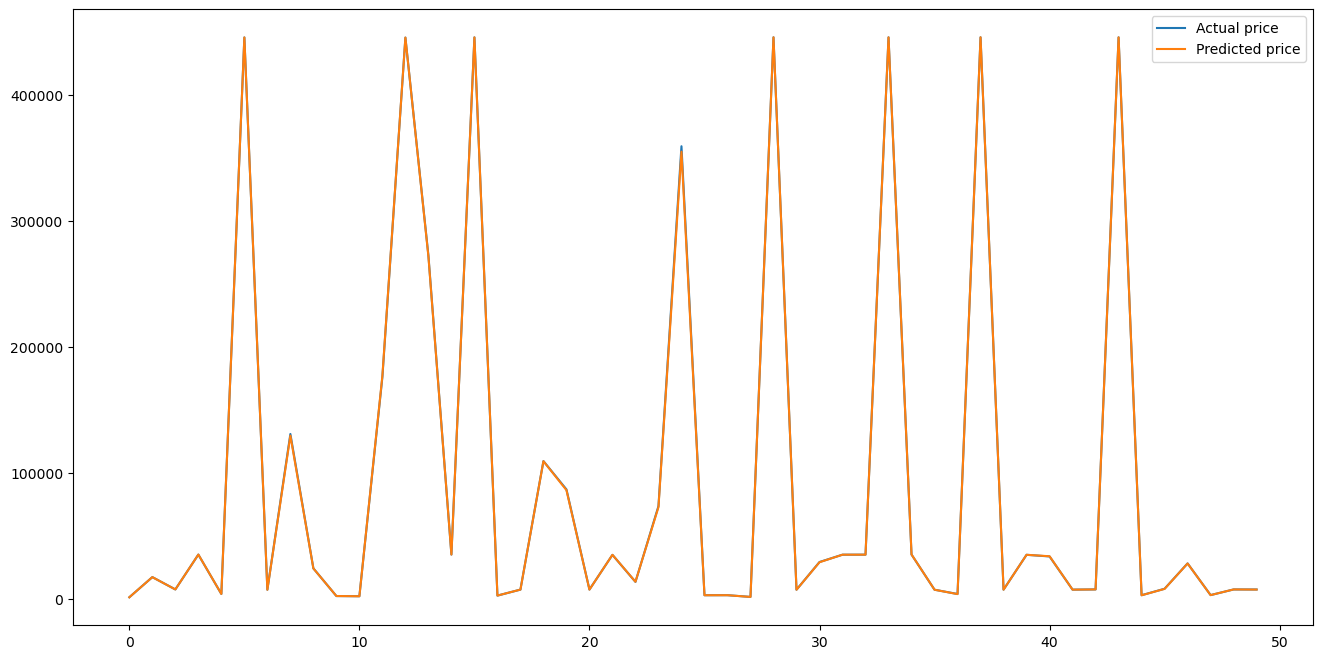

In [74]:
# Plot
 
test = pd.DataFrame({'Predicted price':y_pred, 'Actual price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual price','Predicted price'])

In [77]:
# Create DataFrame for January 1st, 2024 with placeholder values
jan_2024_data = {
    'Likes': [100],  # Placeholder value, replace with an estimate or leave as is
    'Dislikes': [20],  # Placeholder value, replace with an estimate or leave as is
    'Followers': [50000],  # Placeholder value, replace with an estimate or leave as is
}

df_jan_2024 = pd.DataFrame(jan_2024_data, columns=['Likes', 'Dislikes', 'Followers'])

# Predict the price for January 1st, 2024 using the best model
jan_2024_price = best_model.predict(df_jan_2024)

# Display the result
print("Predicted Price for January 1st, 2024:", jan_2024_price)

Predicted Price for January 1st, 2024: [171589.9382]


# Interpretation for bar graph
The bar graph shows the relative weights of six features in the classification results of a machine learning model. The features are price, likes, followers, dislikes, day 7 after, and day 14 after. The y-axis represents the weights, which range from 0 to 1. 
The higher the weight, the more important the feature is for the model.
Price is the most important feature, with a weight of 1. This means that the model relies heavily on the price of the product or service to make predictions.
Likes, followers, and dislikes are also important features, with weights around 0.8 to 0.9. This means that the model considers the social media engagement of the product or service to be relevant for the predictions.
Day 7 after and day 14 after are the least important features, with weights around 0.2. This means that the model does not pay much attention to the performance of the product or service after one or two weeks of its launch.

# Interpretation for heatmap
The variables Price, Likes, Dislikes, and Followers are all positively correlated with each other, with correlation coefficients around 0.8. This means that they tend to increase or decrease together in a linear fashion.
The variable Price has the strongest correlation with the other variables, as indicated by the darker blue color in the heatmap. This suggests that Price is an important factor for the model or analysis that generated the correlation matrix.
The diagonal cells of the matrix show a perfect positive correlation of 1, as each variable is correlated with itself. These cells are not useful for interpretation.

# Interpretation for pairplot
The variables Price, Likes, Dislikes, and Followers are all positively correlated with each other, as shown by the upward trend of the scatter plots. This means that as one variable increases, so does another.
The variable Price has the strongest correlation with the other variables, as indicated by the steeper slope of the scatter plots. This suggests that Price is an important factor for the model or analysis that generated the graphs.
 the histogram for Price shows that most of the data points have low prices, while the histogram for Followers shows that more data points have higher followers count.

# Interpretation for Predicted vs. Actual Price
The image shows a line graph comparing the actual and predicted prices of some product or service over time or categories. The graph shows that the predictions are not very accurate, as there is a large discrepancy between the actual and predicted prices. The actual prices are more volatile, while the predicted prices are smoother. This could indicate that the model or method that generated the predictions is not capturing the variability or trends in the data well.